<a href="https://colab.research.google.com/github/Rizwan-analytics/data_analysis_portfolio/blob/main/Real_state_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Required libraries**

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


**How can we read the file and see first five rows**

In [34]:
from google.colab import files
upload = files.upload()

Saving Real_state_dataset.xlsx to Real_state_dataset (1).xlsx


In [42]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('₹', '')
display(df.head())

,property_id,city,property_type,bhk,price__lakhs,area_sq._ft,seller_type,status
0,101,Mumbai,Apartment,2BHK,95,850,Builder,Available
1,102,Delhi,Villa,4BHK,250,2500,Owner,Sold
2,103,Bangalore,Apartment,3BHK,125,1200,Agent,Available
3,104,Hyderabad,Independent House,5BHK,180,3000,Owner,Under Construction
4,105,Chennai,Apartment,1BHK,45,600,Builder,Available


In [41]:
df = pd.read_excel('/content/Real_state_dataset.xlsx')

In [36]:
df.head(5)

,Property ID,City,Property Type,BHK,Price (₹ Lakhs),Area (Sq. Ft),Seller Type,Status
0,101,Mumbai,Apartment,2BHK,95,850,Builder,Available
1,102,Delhi,Villa,4BHK,250,2500,Owner,Sold
2,103,Bangalore,Apartment,3BHK,125,1200,Agent,Available
3,104,Hyderabad,Independent House,5BHK,180,3000,Owner,Under Construction
4,105,Chennai,Apartment,1BHK,45,600,Builder,Available


**Data preparing and transforming**

In [44]:
df.dtypes # check data types

,0
property_id,int64
city,object
property_type,object
bhk,object
price__lakhs,int64
area_sq._ft,int64
seller_type,object
status,object


In [38]:
# is there any null values in this dataset if it is, please replace by 0
df_null = df.isnull().sum()

print(f'these are columns which will show us null values if it is\n',df_null)

these are columns which will show us null values if it is
 Property ID        0
City               0
Property Type      0
BHK                0
Price (₹ Lakhs)    0
Area (Sq. Ft)      0
Seller Type        0
Status             0
dtype: int64


In [39]:
duplicate_rows = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_rows}')

Number of duplicate rows: 0


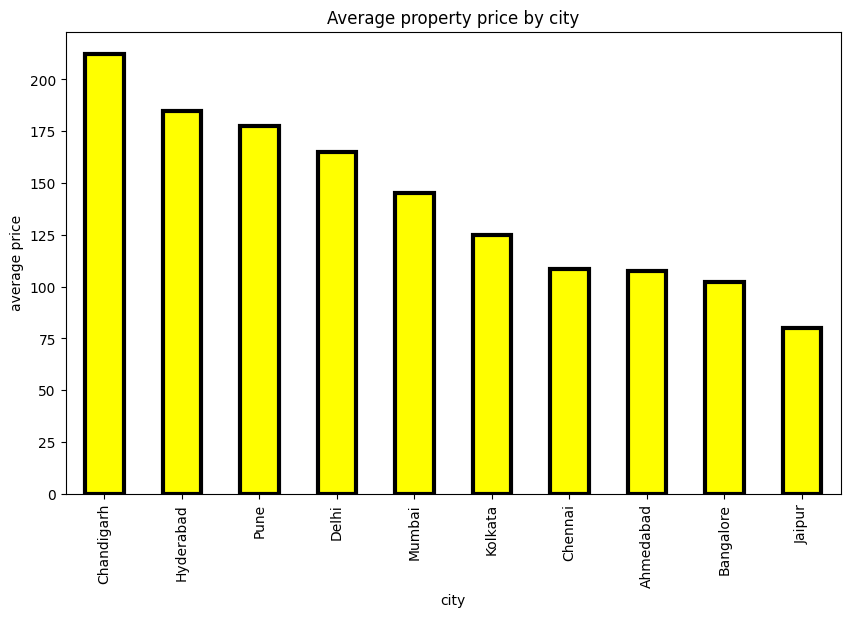

In [49]:
# Here we would like to show you how price vary city to city
city_avg_price = df.groupby('city')['price__lakhs'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
city_avg_price.plot(kind='bar', color='yellow', edgecolor='black', linewidth=3)
plt.title('Average property price by city')
plt.xlabel('city')
plt.ylabel('average price')
plt.show()

INSIGHTS >> CHANDIRAGH IS MOST EXPENSIVE PLACE IN ORDER TO PRICE

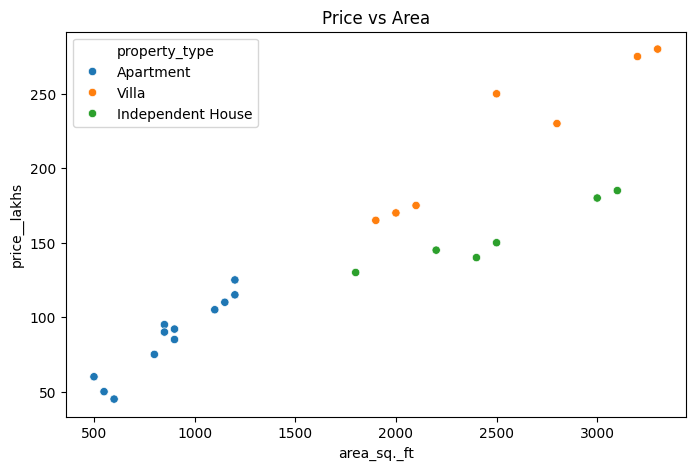

In [55]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='area_sq._ft', y='price__lakhs', hue='property_type')
plt.title('Price vs Area')
plt.show()


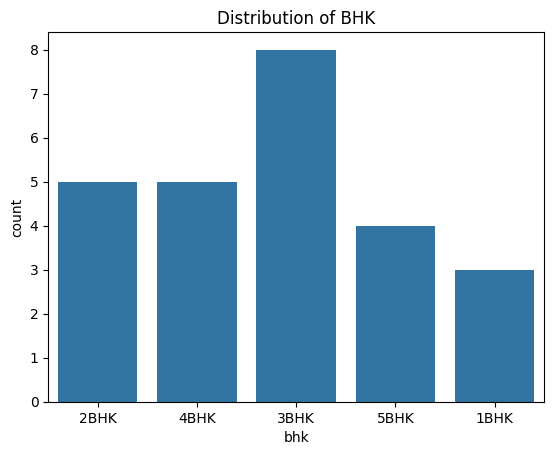

In [56]:
sns.countplot(x='bhk', data=df)
plt.title("Distribution of BHK")
plt.show()


INSIGHTS >>> 3BHK ARE MORE LIKELY BY PEOPLE AND I BHK LESS LIKED BY PEOPLE

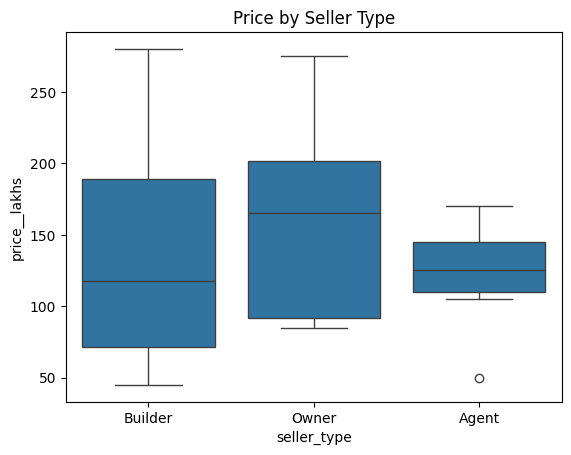

In [58]:
sns.boxplot(x='seller_type', y='price__lakhs', data=df)
plt.title("Price by Seller Type")
plt.show()


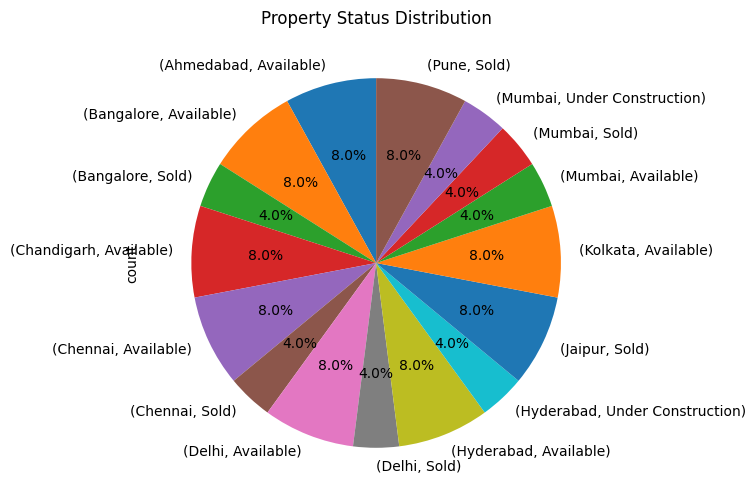

In [64]:
status_counts = df.groupby('city')['status'].value_counts()
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title('Property Status Distribution')
plt.show()


**key insights**;
City Price Comparison: Mumbai and Delhi show highest average prices.

Price vs Area: Larger properties typically cost more, but some outliers exist.

Seller Influence: Builder listings have generally higher prices than owner-listed properties.

Status Impact: Ready-to-move properties are priced slightly higher on average.

BHK Trends: 2 and 3 BHKs dominate listings; rare BHKs (like 5+) may be luxury properties.